In [9]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [46]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [47]:
le = LabelEncoder()
train_df['Weight_Status'] = le.fit_transform(train_df['Weight_Status'])
le = LabelEncoder()
train_df['Gender'] = le.fit_transform(train_df['Gender'])
le = LabelEncoder()
test_df['Weight_Status'] = le.fit_transform(test_df['Weight_Status'])
le = LabelEncoder()
test_df['Gender'] = le.fit_transform(test_df['Gender'])

In [48]:
train_df['Height_Full'] = train_df['Height(Feet)'] * 12 + train_df['Height(Remainder_Inches)']
test_df['Height_Full'] = test_df['Height(Feet)'] * 12 + test_df['Height(Remainder_Inches)']

train_df.drop(columns = ['Height(Feet)', 'Height(Remainder_Inches)','ID'], inplace = True)
test_df.drop(columns = ['Height(Feet)', 'Height(Remainder_Inches)','ID'], inplace = True)

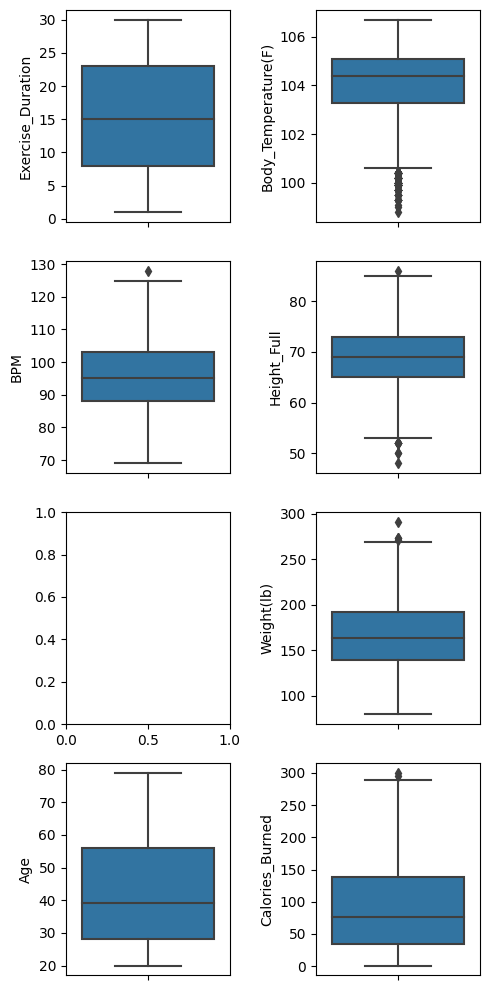

In [37]:
fig, axes = plt.subplots(4,2, figsize = (5,10))

sns.boxplot(y = train_df['Exercise_Duration'], ax = axes[0][0])
sns.boxplot(y = train_df['Body_Temperature(F)'], ax = axes[0][1])

sns.boxplot(y = train_df['BPM'], ax = axes[1][0])
sns.boxplot(y = train_df['Height_Full'], ax = axes[1][1])

sns.boxplot(y = train_df['Weight(lb)'], ax = axes[2][1])

sns.boxplot(y = train_df['Age'], ax = axes[3][0])
sns.boxplot(y = train_df['Calories_Burned'], ax = axes[3][1])

plt.tight_layout()
plt.show()

In [49]:
# body temperature은 log transformation
# bpm, height_full, weight(lb) 이상치 확인

""" IQR 처리 """
outlier_column = ['BPM','Height_Full','Weight(lb)','Body_Temperature(F)','Calories_Burned']
for i in outlier_column:
  Q1 = train_df[i].quantile(0.25)
  Q3 = train_df[i].quantile(0.75)

  IQR = Q3 - Q1
  MIN = Q1 - 1.5 * IQR
  MAX = Q3 + 1.5 * IQR
  target = train_df[(train_df[i] < MIN) | (train_df[i] > MAX)]
  train_df.drop(target.index, inplace = True)
  print(f'{len(target.index)} data is outlier')
print(f'Delete the data...')

1 data is outlier
11 data is outlier
3 data is outlier
193 data is outlier
2 data is outlier
Delete the data...


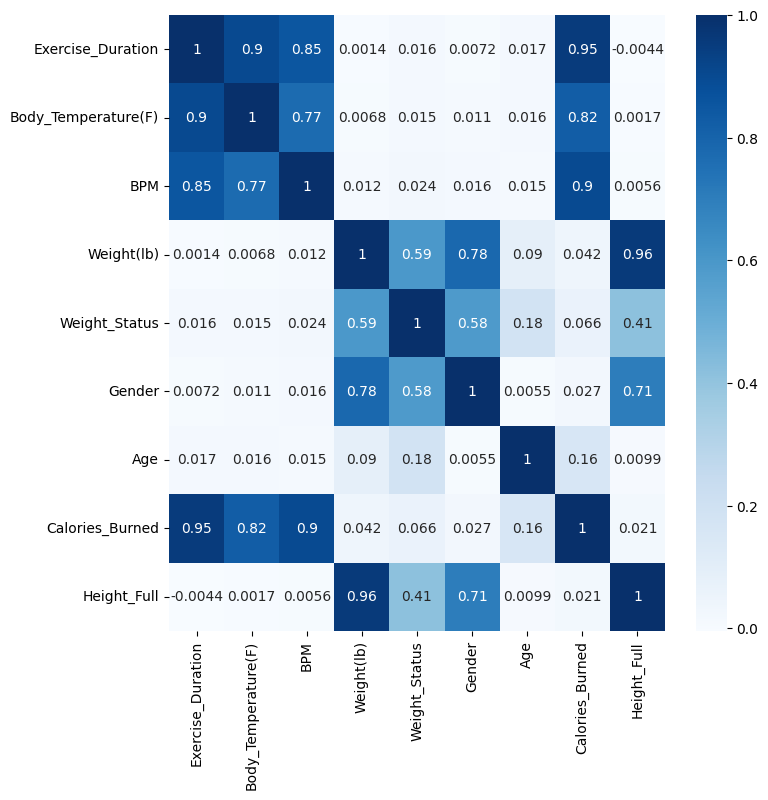

In [32]:
plt.figure(figsize = (8,8))
sns.heatmap(train_df.corr(), annot = True, cmap = 'Blues')
plt.show()

In [50]:
mm_list =[]

for idx,i in enumerate(train_df.columns):
  if i == 'Calories_Burned' :
    continue
  mm = MinMaxScaler()
  fitted = mm.fit(train_df[i].values.reshape(-1,1))
  result = mm.transform(train_df[i].values.reshape(-1,1))
  train_df[i] = result.reshape(-1)
  mm_list.append(mm)
for idx, i in enumerate(test_df.columns):
  result = mm_list[idx].transform(test_df[i].values.reshape(-1,1))
  test_df[i] = result.reshape(-1)

In [33]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━

In [51]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label = 'Calories_Burned', eval_metric = 'rmse',problem_type = 'regression' ) . fit(train_data = train_df)

No path specified. Models will be saved in: "AutogluonModels/ag-20230414_111910/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230414_111910/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    7290
Train Data Columns: 8
Label Column: Calories_Burned
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11883.49 MB
	Train Data (Original)  Memory Usage: 0.47 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	

[1000]	valid_set's rmse: 1.73828
[2000]	valid_set's rmse: 1.54601
[3000]	valid_set's rmse: 1.47711
[4000]	valid_set's rmse: 1.44369
[5000]	valid_set's rmse: 1.42552
[6000]	valid_set's rmse: 1.41598
[7000]	valid_set's rmse: 1.41725
[8000]	valid_set's rmse: 1.41708


	-1.4137	 = Validation score   (-root_mean_squared_error)
	7.05s	 = Training   runtime
	0.73s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 1.60017
[2000]	valid_set's rmse: 1.55314
[3000]	valid_set's rmse: 1.54963
[4000]	valid_set's rmse: 1.55245


	-1.5464	 = Validation score   (-root_mean_squared_error)
	5.22s	 = Training   runtime
	0.37s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-3.4974	 = Validation score   (-root_mean_squared_error)
	3.65s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ...
	-0.6337	 = Validation score   (-root_mean_squared_error)
	81.08s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-3.1184	 = Validation score   (-root_mean_squared_error)
	2.08s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		No module named 'torch.mps'
Fitting model: XGBoost ...
	-1.7712	 = Validation score   (-root_mean_squared_error)
	8.21s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: NeuralNetTorch ...
		No module named 'torch.mps'
Fitting model: LightGBMLarge ...


[1000]	valid_set's rmse: 1.95609
[2000]	valid_set's rmse: 1.93737
[3000]	valid_set's rmse: 1.93397
[4000]	valid_set's rmse: 1.93297
[5000]	valid_set's rmse: 1.9326
[6000]	valid_set's rmse: 1.93251
[7000]	valid_set's rmse: 1.93247
[8000]	valid_set's rmse: 1.93246
[9000]	valid_set's rmse: 1.93246
[10000]	valid_set's rmse: 1.93246


	-1.9325	 = Validation score   (-root_mean_squared_error)
	23.47s	 = Training   runtime
	1.44s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-0.6272	 = Validation score   (-root_mean_squared_error)
	0.26s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 143.06s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230414_111910/")


In [52]:
# male_pred = male_predictor.predict(test_male)
# female_pred = female_predictor.predict(test_female)
pred = predictor.predict(test_df)

In [53]:
print(len(male_pred))
print(len(female_pred))

NameError: ignored

In [ ]:
male_cnt = 0 
female_cnt = 0
test_df['Calories_Buned'] = [0.1 for i in range(len(test_df))]
for idx in range(len(test_df)):
  if test_df.loc[idx,'Gender'] == 0.0:
    test_df.loc[idx,'Calories_Burned'] = male_pred.values[male_cnt]
    male_cnt +=1
  else:
    test_df.loc[idx,'Calories_Burned'] = female_pred.values[female_cnt]
    female_cnt += 1


In [54]:
submission = pd.read_csv('./sample_submission.csv')
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7500 non-null   object
 1   Calories_Burned  7500 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.3+ KB


In [55]:
submission['Calories_Burned'] = pred
submission.to_csv('./submission.csv', index = False)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7500 non-null   object 
 1   Calories_Burned  7500 non-null   float32
dtypes: float32(1), object(1)
memory usage: 88.0+ KB
